<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 3

###  Feature Engineering, Regression, and Regularization

---

The application of machine learning to home pricing is a burgeoning field. Companies like OpenDoor are taking on the historically insular and unscientific real estate sales market by applying data science to better predict trends, detect patterns, and ultimately undercut the competition. 

This project uses the [Ames housing data recently made available on kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques). The housing data available in this project has around 80 different variables cataloguing a wide variety of attributes for real estate properties. The target variable of interest is the sales price.

What has the most impact on the sales price of a house? Is just using square footage and building age sufficient, or are there other less obvious factors at play? You'll get to investigate what's important using EDA and regularized regression models, and practice model evaluation and cross-validation.

---

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `housing.csv` dataset

---

The csv is located in the `DSI-SF-4/datasets/housing_regression` folder in your repo. 

**There is a file describing the columns in the dataset in the `data_description.txt` file in the same folder that contains the information on what the variables represent.**


In [1]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
from matplotlib.ticker import FormatStrFormatter

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error

sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
house = pd.read_csv('/Users/jspath/desktop/DSI-SF-4/datasets/housing_regression/housing.csv')

In [33]:
house.columns
house.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1450 entries, 0 to 1459
Data columns (total 84 columns):
Id               1450 non-null int64
MSSubClass       1450 non-null int64
MSZoning         1450 non-null object
LotFrontage      1191 non-null float64
LotArea          1450 non-null int64
Street           1450 non-null object
Alley            89 non-null object
LotShape         1450 non-null object
LandContour      1450 non-null object
Utilities        1450 non-null object
LotConfig        1450 non-null object
LandSlope        1450 non-null object
Neighborhood     1450 non-null object
Condition1       1450 non-null object
Condition2       1450 non-null object
BldgType         1450 non-null object
HouseStyle       1450 non-null object
OverallQual      1450 non-null int64
OverallCond      1450 non-null int64
YearBuilt        1450 non-null int64
YearRemodAdd     1450 non-null int64
RoofStyle        1450 non-null object
RoofMatl         1450 non-null object
Exterior1st      1450 non-n

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Examine the `SalePrice` variable

---

### 2.1 Plot the distribution of the `SalesPrice` variable and describe it with pandas

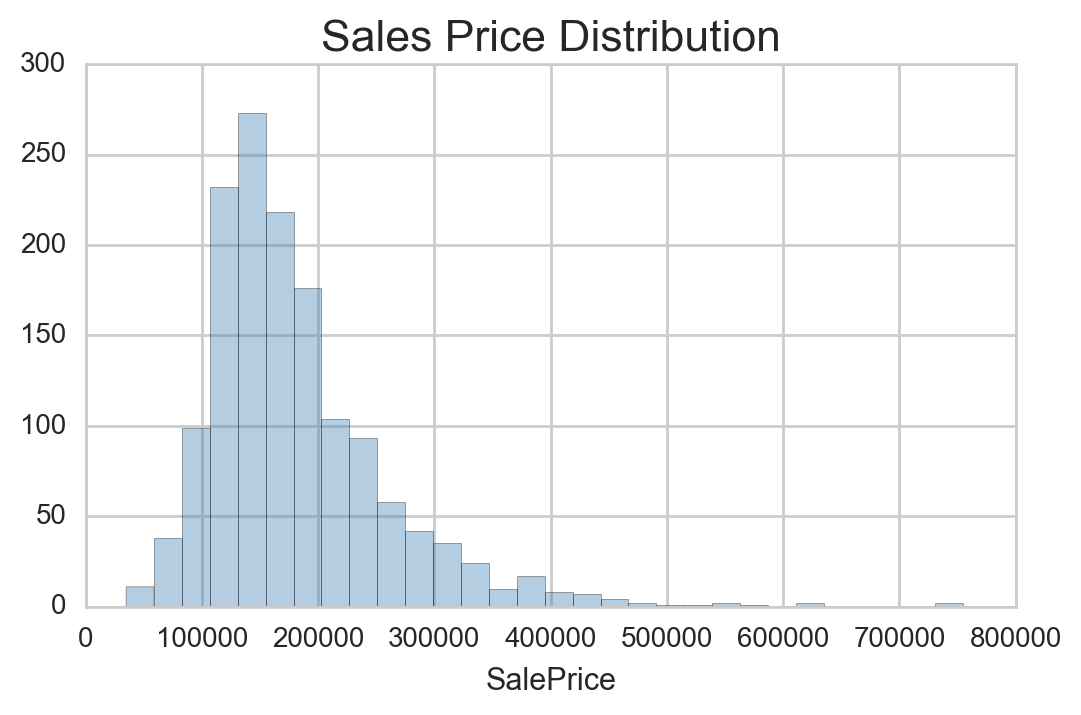

In [4]:
# Code to create sales price distribution plot.
fig = plt.figure(figsize=(6,3.5))
ax = fig.gca()
ax = sns.distplot(house.SalePrice, kde=False, color='steelblue', ax=ax, bins=30)

ax.set_title('Sales Price Distribution', fontsize=16)

In [5]:
#Describe Sale Price
#house.describe['SalePrice'] ###### Not working - tried multiple syntaxes here

house['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

### 2.2 Create a transformed version of the `SalesPrice` variable that makes it more normally distributed

Two common transformations to deal with long tails are taking the square root and taking the log of a variable. 

Plot the transformed variable.

In [6]:
#Get the SQRT of SalePrice and add it to the dataframe
house['SqrtSalePrice'] = np.sqrt(house['SalePrice'])

#Get the natural logarithm of SalePrice and add it to the dataframe.
house['LogSalePrice'] = np.log(house['SalePrice'])

house['GrLivArea'].describe()

count    1460.000000
mean     1515.463699
std       525.480383
min       334.000000
25%      1129.500000
50%      1464.000000
75%      1776.750000
max      5642.000000
Name: GrLivArea, dtype: float64

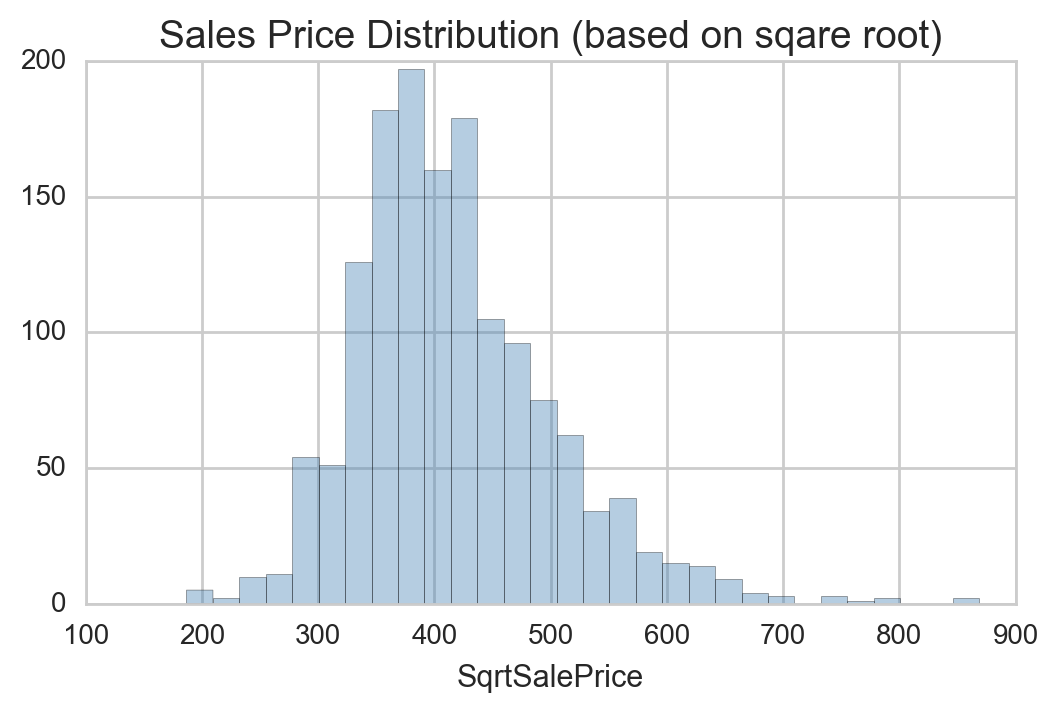

In [7]:
# Code to create sales price sqrt distribution plot.
fig = plt.figure(figsize=(6,3.5))
ax = fig.gca()
ax = sns.distplot(house.SqrtSalePrice, kde=False, color='steelblue', ax=ax, bins=30)

ax.set_title('Sales Price Distribution (based on sqare root)', fontsize=14)

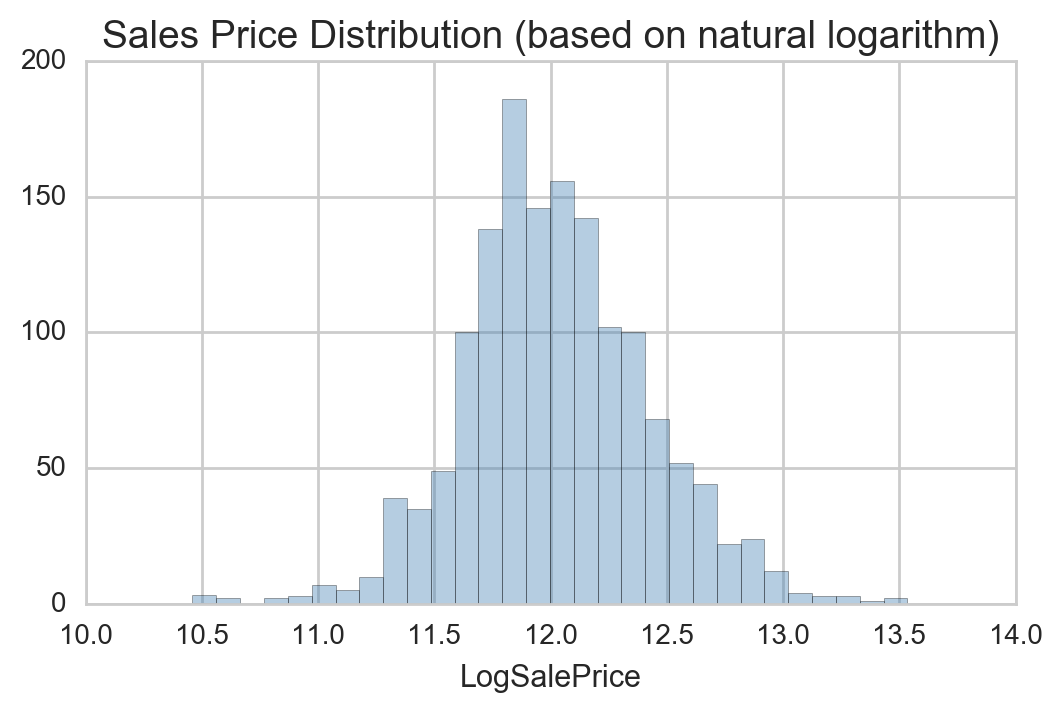

In [8]:
# Code to create sales price natural logarithm distribution plot.
fig = plt.figure(figsize=(6,3.5))
ax = fig.gca()
ax = sns.distplot(house.LogSalePrice, kde=False, color='steelblue', ax=ax, bins=30)

ax.set_title('Sales Price Distribution (based on natural logarithm)', fontsize=14)

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Correlations with sale price

---

### 3.1 Correlate the age of a house when sold with the sale price

How is the correlation different when using the original and transformed sale price?


In [9]:
#Calculate the age of a how when sold by sutracting year built from year sold.
house['AgeAtSale'] = house['YrSold'] - house['YearBuilt']

In [10]:
#correlatino of sale price to age at last sale
house['AgeAtSale'].corr(house['SalePrice'])

-0.52335041754681599

In [11]:
#correlatino of sale price square root to age at last sale
house['AgeAtSale'].corr(house['SqrtSalePrice'])

-0.56485344444334262

In [12]:
#correlatino of sale price natural logarithm to age at last sale
house['AgeAtSale'].corr(house['LogSalePrice'])

-0.58729004702913679

In [ ]:
# The square root of the SalePrice has a higher correlation to Age at Sale than the SalePrice column.
# Likewise the nature logerithm of SalePrice has a higher correleation with Age at Sale than the square root value.

### 3.2 Plot the age of the house at sale against the sale price variables

How does it differ between the original and transformed variables? What do the charts indicate about the relationship between the variables?

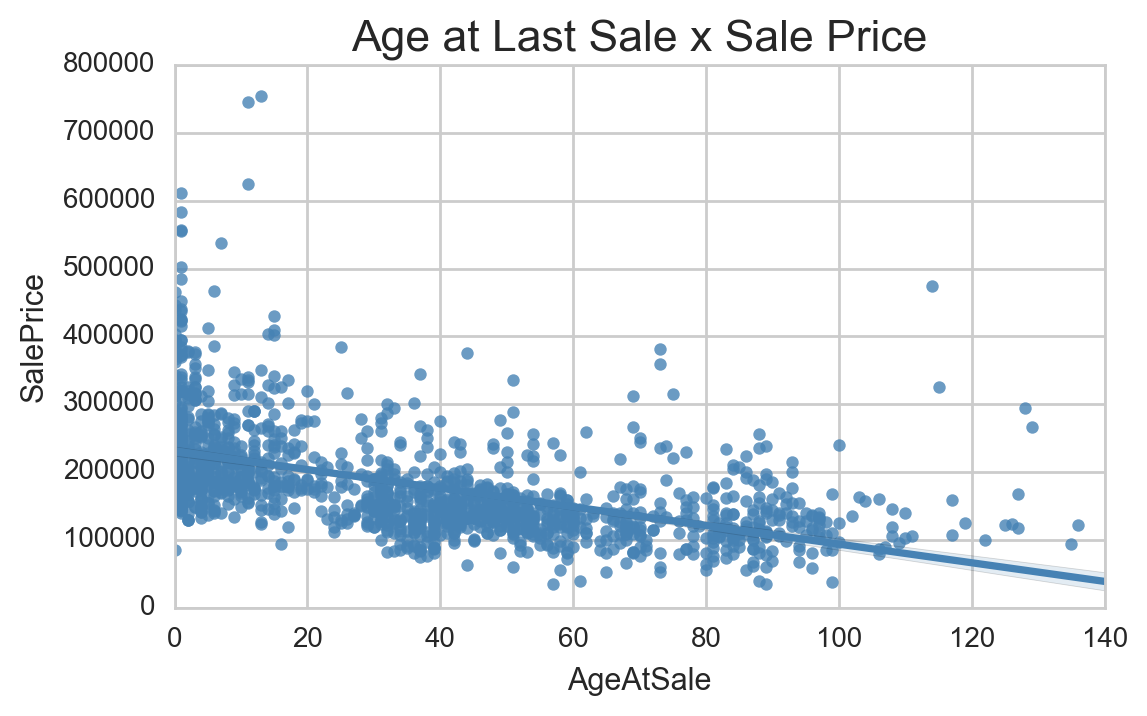

In [13]:
# Code to plot corrleation of Age at Last Sale by Sale Price
fig = plt.figure(figsize=(6,3.5))
plt.ylim(0,800000)
plt.xlim(0,140)
ax = fig.gca()
ax = sns.regplot (house.AgeAtSale, house.SalePrice, color='steelblue', ax=ax)

ax.set_title('Age at Last Sale x Sale Price', fontsize=16)

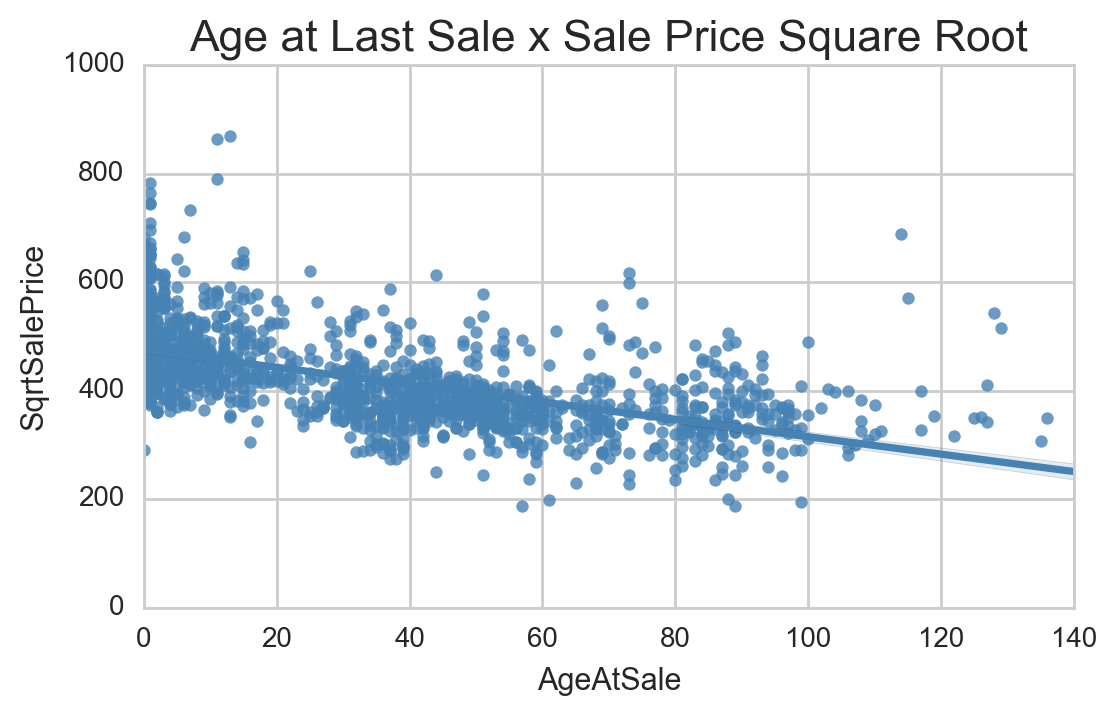

In [14]:
# Code to plot corrleation of Age at Last Sale by Sale Price Square Root
fig = plt.figure(figsize=(6,3.5))
plt.ylim(0,1000)
plt.xlim(0,140)
ax = fig.gca()
ax = sns.regplot (house.AgeAtSale, house.SqrtSalePrice, color='steelblue', ax=ax)

ax.set_title('Age at Last Sale x Sale Price Square Root', fontsize=16)

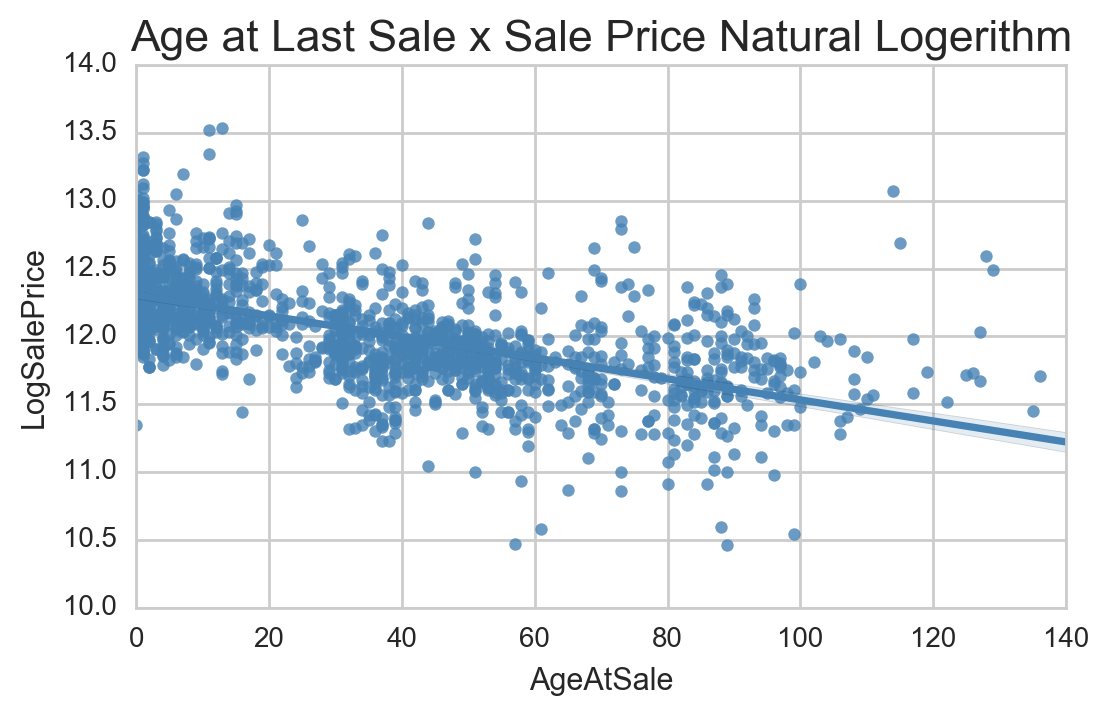

In [15]:
# Code to plot corrleation of Age at Last Sale by Sale Price Natural Logerithm
fig = plt.figure(figsize=(6,3.5))
plt.ylim(10,14)
plt.xlim(0,140)
ax = fig.gca()
ax = sns.regplot (house.AgeAtSale, house.LogSalePrice, color='steelblue', ax=ax)

ax.set_title('Age at Last Sale x Sale Price Natural Logerithm', fontsize=16)

### 3.3 Visually compare price to total livable square feet, `GrLivArea`

What is the relationship, if any?

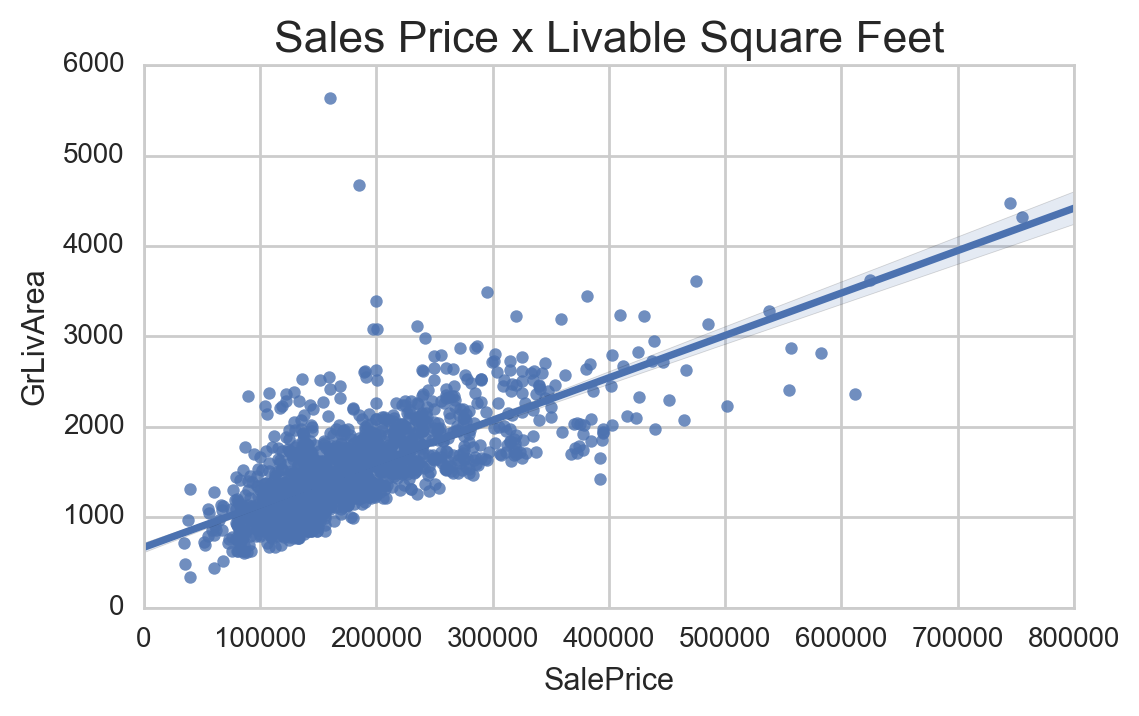

In [16]:
# Code to create sales price by livable square feet plot.
fig = plt.figure(figsize=(6,3.5))
plt.ylim(0, 6000)
plt.xlim(0,800000)
ax = fig.gca()
ax = sns.regplot (house.SalePrice, house.GrLivArea) # kde=False, color='steelblue', ax=ax, bins=30)

ax.set_title('Sales Price x Livable Square Feet', fontsize=16)

### 3.4 Plot and describe the relationship between two continuous variables of your choice in the data

Why did you choose those variables? What is the relationship that the chart sbows, if any?

In [17]:
#I want to know how the square footage of the first floor correlates to the lot area.
#This will tell me how house and lot size are related.

#correlatino of lot size to age at square foot of the first floor
house['LotArea'].corr(house['1stFlrSF'])

0.29947457850776293

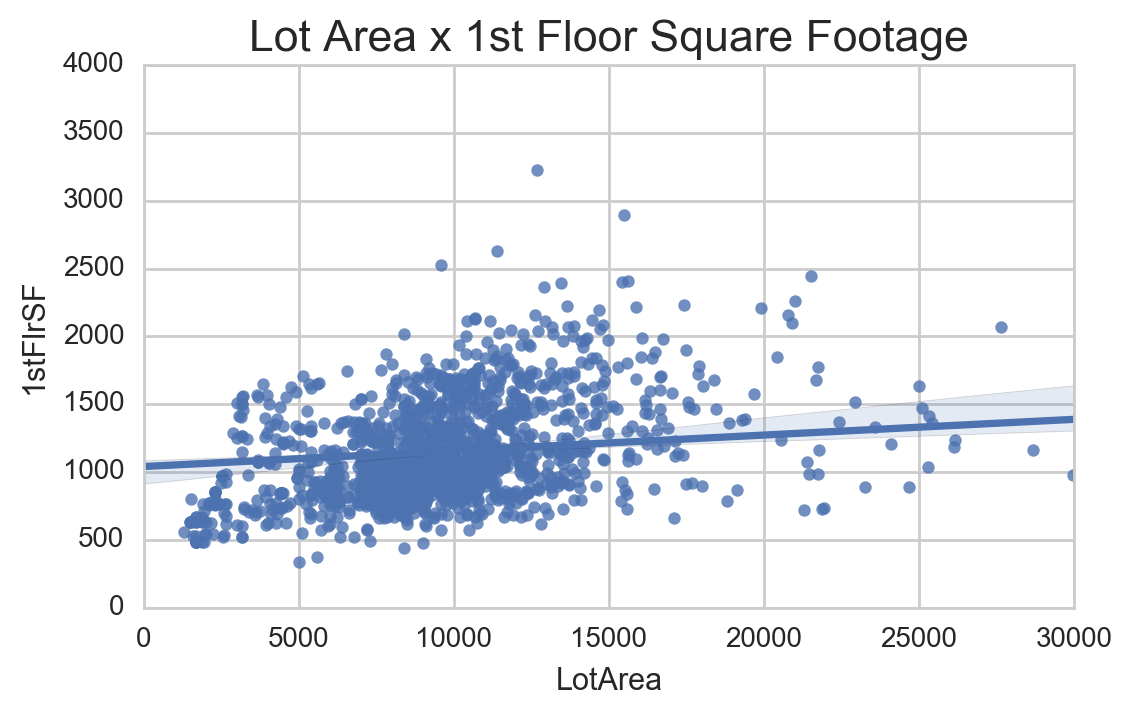

In [18]:
# CCode to plot corrleation of Lot Area by Sale 1st Floor Squre Footage
fig = plt.figure(figsize=(6,3.5))
plt.ylim(0, 4000)
plt.xlim(0,30000)
ax = fig.gca()
ax = sns.regplot (house.LotArea, house['1stFlrSF']) # kde=False, color='steelblue', ax=ax, bins=30)

ax.set_title('Lot Area x 1st Floor Square Footage', fontsize=16)

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Data transformation and quality assessment

---

**Note: from this point onward, you can use your transformed price variable or the original price variable. Up to you. It will change the interpretation of the coefficients in your model.**

### 4.1 Restrict the data 

Only keep houses that are residential (remove the commercial code buildings).

In [39]:
#'C (all)' is the only commercial zone. Removing rows with 'C (all)'.
house = house[house.MSZoning != 'C (all)']

### 4.2 Handle null values in the dataset

Many of the variables contain null values. In many of these cases the null value is actually representative of a category that is a level of a categorical variable.

Eliminate the null values from your dataset, explaining your rationale for each variable. You have options for null values:

- Replace the null values (impute).
- Drop the observation.
- Drop the variable. 

In [165]:
# I. First, get unique values for all of the discrete columns
# Note: individual executable lines are commented out in this section once EDA is complete for this column.

#house['MSSubClass'].value_counts()
#MSSubClass looks good

#house['MSZoning'].value_counts()
#MSZoning looks good

#house['Street'].value_counts()
#dropping street as a column (see section 4.3)

#house['Alley'].value_counts()
#dropping street as a column (see section 4.3)

#house['LotShape'].value_counts()
#Reclassified lots into either regular or irregular
#house.loc[house['LotShape'] == 'IR1', 'LotShape'] = 'Irr'
#house.loc[house['LotShape'] == 'IR2', 'LotShape'] = 'Irr'
#house.loc[house['LotShape'] == 'Other', 'LotShape'] = 'Irr'


#house['LandContour'].value_counts()
#dropping land contour as a column (see section 4.3)

#house['Utilities'].value_counts()
#dropping utilitiez as a column (see section 4.3)

#house['LotConfig'].value_counts()
#LotConfig looks good

#house['LandSlope'].value_counts()
#LandSlope looks good

#house['Neighborhood'].value_counts()
#Neighborhood looks good

#house['Condition1'].value_counts()
#dropping Colndition1 as a column (see section 4.3) 

#house['Condition2'].value_counts()
#dropping Condition2 as a column (see section 4.3)

#house['BldgType'].value_counts()
#BldgType looks good

#house['HouseStyle'].value_counts()
#HouseStyle looks good

#house['OverallQual'].value_counts()
#OverallQual looks good

#house['OverallCond'].value_counts()
#OverallCond looks good

#house['RoofStyle'].value_counts()
#Reclassifying minor RoofStyles
#house.loc[house['RoofStyle'] == 'Flat', 'RoofStyle'] = 'Other'
#house.loc[house['RoofStyle'] == 'Gambrel', 'RoofStyle'] = 'Other'
#house.loc[house['RoofStyle'] == 'Mansard', 'RoofStyle'] = 'Other'
#house.loc[house['RoofStyle'] == 'Shed', 'RoofStyle'] = 'Other'

#house['RoofMatl'].value_counts()
#dropping Condition2 as a column (see section 4.3)

#house['Exterior1st'].value_counts()
#Reclassifying minor Exterior1st
#house.loc[house['Exterior1st'] == 'Stone', 'Exterior1st'] = 'Other'
#house.loc[house['Exterior1st'] == 'BrkComm', 'Exterior1st'] = 'Other'
#house.loc[house['Exterior1st'] == 'AsphShn', 'Exterior1st'] = 'Other'
#house.loc[house['Exterior1st'] == 'ImStucc', 'Exterior1st'] = 'Other'
#house.loc[house['Exterior1st'] == 'CBlock', 'Exterior1st'] = 'Other'

#house['Exterior1st'].value_counts()
#Exterior1st looks good

#house['Exterior2nd'].value_counts()
#Reclassifying minor values of Exterior2nd
#house.loc[house['Exterior2nd'] == 'Stone', 'Exterior2nd'] = 'Other'
#house.loc[house['Exterior2nd'] == 'Brk Cmn', 'Exterior2nd'] = 'Other'
#house.loc[house['Exterior2nd'] == 'AsphShn', 'Exterior2nd'] = 'Other'
#house.loc[house['Exterior2nd'] == 'ImStucc', 'Exterior2nd'] = 'Other'
#house.loc[house['Exterior2nd'] == 'CBlock', 'Exterior2nd'] = 'Other'

#house['MasVnrType'].value_counts()
#MasVnrType looks good

#house['ExterQual'].value_counts()
#ExterQual looks good

#house['ExterCond'].value_counts()
#Dropped excellent and poor ExterCond rows as there were very few of each.
#house = house.drop(house[house.ExterCond == 'Po'].index)
#house = house.drop(house[house.ExterCond == 'Ex'].index)


#house['Foundation'].value_counts()
#Grouped low count foundation types into an 'other' category.
#house.loc[house['Foundation'] == 'Slab', 'Foundation'] = 'Other'
#house.loc[house['Foundation'] == 'Stone', 'Foundation'] = 'Other'
#house.loc[house['Foundation'] == 'Wood', 'Foundation'] = 'Other'

#house['BsmtQual'].value_counts()
#BsmtQual looks good

#house['BsmtCond'].value_counts()
#BsmtCond looks good

#house['BsmtExposure'].value_counts()
#BsmtExposure looks good

#house['BsmtFinType1'].value_counts()
#BsmtFinType1 looks good

#house['BsmtFinType2'].value_counts()
#BsmtFinType2 looks good

#house['Heating'].value_counts()
#dropping heating as a column (see section 4.3)

#house['HeatingQC'].value_counts()
#HeatingQC looks good

#house['CentralAir'].value_counts()
#CentralAir looks good

#house['Electrical'].value_counts()
#Electrical

#house['Electrical'].value_counts()
#Grouped non-circuit breaker Electrical into an 'other' category.
#house.loc[house['Electrical'] == 'FuseA', 'Electrical'] = 'Other'
#house.loc[house['Electrical'] == 'FuseF', 'Electrical'] = 'Other'
#house.loc[house['Electrical'] == 'FuseP', 'Electrical'] = 'Other'
#house.loc[house['Electrical'] == 'Mix', 'Electrical'] = 'Other'

#house['KitchenQual'].value_counts()
#KitchenQual looks good

#house['Functional'].value_counts()
#Grouping all Functional that are not 'Typ' into an 'Other category.
#house.loc[house['Functional'] != 'Typ', 'Functional'] = 'Other'


#house['Fireplaces'].value_counts()
#679 houses do not have fireplaces
#house['FireplaceQu'].value_counts()
#house.loc[house['Fireplaces'] == 0, 'FireplaceQu'] = 'Other'
#All housees w/o fireplaces no have fireplace quality = na

#house['GarageType'].value_counts()
#GarageType looks good

#house['GarageFinish'].value_counts()
#GarageFinish

#house['GarageQual'].value_counts()
#GarageQual looks good

#house['GarageCond'].value_counts()
#GarageCond looks good

#house['PavedDrive'].value_counts()
#PavedDrive looks good

#house['PoolQC'].value_counts()
#dropping pool quality as a column (see section 4.3)

#house['Fence'].value_counts()
#dropping Fence as a column (see section 4.3)

#house['MiscFeature'].value_counts()
##dropping MiscFeature as a column (see section 4.3)

#house['SaleType'].value_counts()
#Grouped SalesType into 'WD', 'New' and 'other' categies.
# house.loc[house['SaleType'] == 'COD', 'SaleType'] = 'Other'
# house.loc[house['SaleType'] == 'ConLD', 'SaleType'] = 'Other'
# house.loc[house['SaleType'] == 'ConLw', 'SaleType'] = 'Other'
# house.loc[house['SaleType'] == 'ConLI', 'SaleType'] = 'Other'
# house.loc[house['SaleType'] == 'CWD', 'SaleType'] = 'Other'
# house.loc[house['SaleType'] == 'Oth', 'SaleType'] = 'Other'
# house.loc[house['SaleType'] == 'Con', 'SaleType'] = 'Other'


#house['SaleCondition'].value_counts()
#SaleCondition looks good


# II. Validate number of Rooms

#house['FullBath'].value_counts()
#Need to decide with to do with 0 full bathrooms



# III. Validate ranges and look for missing values in continuous varialbes:
# If messing values - set to 0. Check to see if one of the discrete valeus affeccts it.

#  Lot Frontage, Lot Area, Mas Vnr Area, Bsmt Fin SF1, Bsmt Fin SF2, Bsmt Unf SF, Total Bsmt SF......

# IV. For month and year values, check that the ranges are reasonalbe.
#  What do you do if not?



### 4.3 Remove any variables you think are not viable to use as predictors of price.

This can be a subjective process. A common criterion is to remove variables that have little to no variance. This would be, for example, a  variable where nearly all observations were in a single category or had a single value. 

For each variable you remove (if any), explain your rationale for why.

In [142]:
# Removing Street as nly 4 out of 1450 values for street different (4 gravel, 1446 pave). 
#house = house.drop('Street', 1)

# Removing Alley as Only 89 out of 1450 have an alley. 
#house = house.drop('Alley', 1)

# Removing Land Contour as Only 145 out of 1450 have an a non-level land conntour.
#house = house.drop('LandContour', 1)

#Removing utilities as Only 1 out of 1450 have an a non-public utility. 
#house = house.drop('Utilities', 1)

#Removing LandSlope as Only 85 out of 1450 have sigificant slope. 
#house = house.drop('LandSlope', 1)

#Removing Condition1 and Conditions2 as both have potential to contain non-mutually exclusive values. 
#house = house.drop('Condition1', 1)
#house = house.drop('Condition2', 1)

#Removing Heating as Only 31 out of 1450 are non-composite. 
#house = house.drop('Heating', 1)

#Removing Pool Quality as Only 8 out of 1450 rows have values. 
#house = house.drop('PoolQC', 1)

#Removing Fence as Only 265 out of 1450 rows have values. 
house = house.drop('Fence', 1)

#Removing MiscFeature as Only 51 out of 1450 rows have values. 
#house = house.drop('MiscFeature', 1)



#Use Pair plot to identify any varialbes
#Also use gut feel based on knowkedge of 
# sometimes 0
# sometime missing data
# look for important columns and analyze  


#Pair Plot wouldn't run!!!!!!!!!

ValueError: labels ['Fence'] not contained in axis

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Plot a correlation matrix between the continuous variables

---

**Some columns in the DataFrame are numeric type, but that doesn't necessarily mean that they are continuous. Sometimes numeric values are used to represent the levels of a categorical variable.**

To plot a correlation matrix, it is popular to represent the correlation values using hue with a "heatmap". Look up how to plot a heatmap of a correlation matrix in python and show it below. Make sure that the variable labels are clear on the axes.

Describe anything interesting or notable you observe from the correlation matrix.

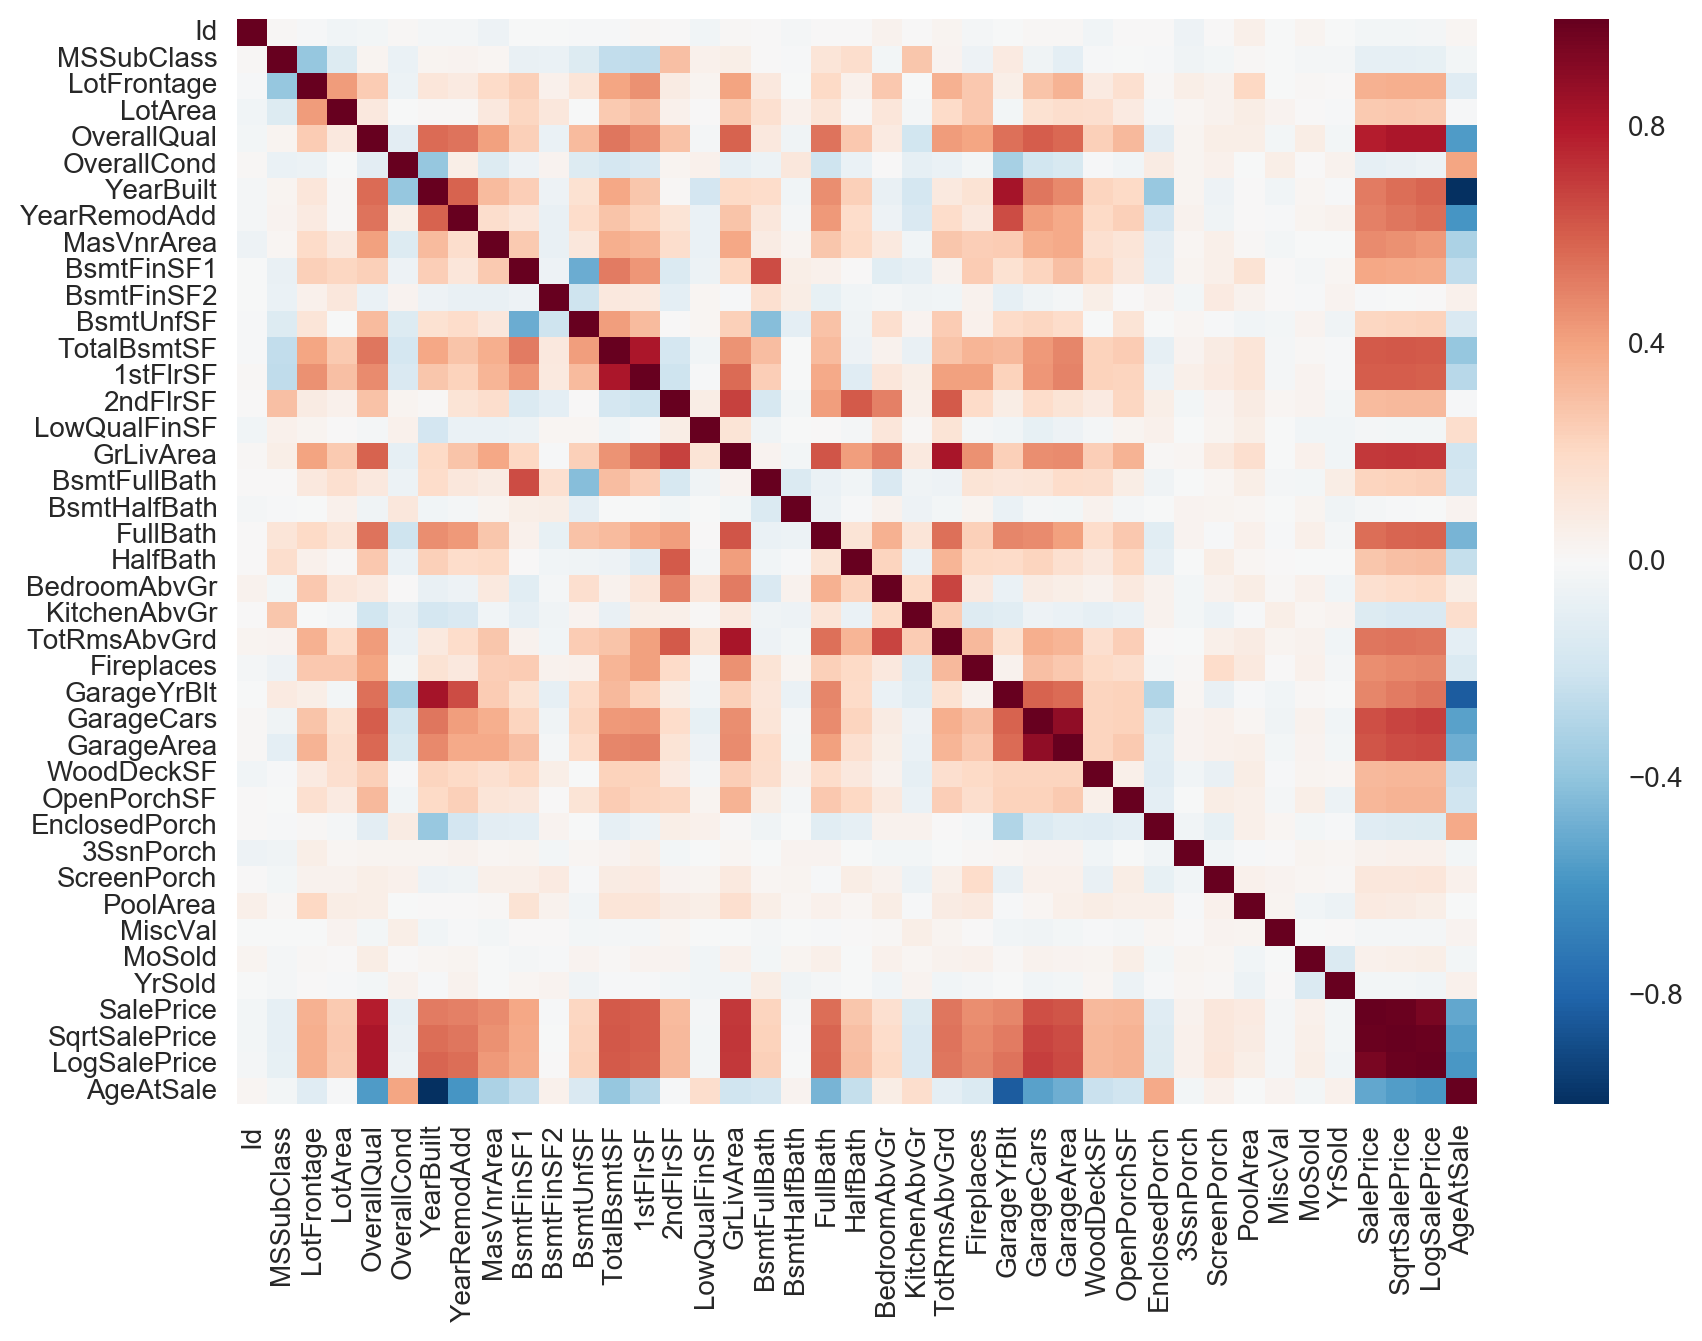

In [105]:
########  Sample Heat Map Code from the Curriculum

# Heatmap for the House correlations

sns.set(rc={"figure.figsize": (10, 7)})
sns.heatmap(house.corr())

# discrete values with more than 90%


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 6. Make boxplots of categorical variables against the sale price

---

You don't have to plot all of them unless you want to. Make at least 8 boxplots looking at the distribution of sale price across levels of categorical variables in your dataset. This can be whichever categorical variables interest you the most.

Write up a few findings on the relationship between sales price and the categorical variables you chose to plot. Anything surprising?

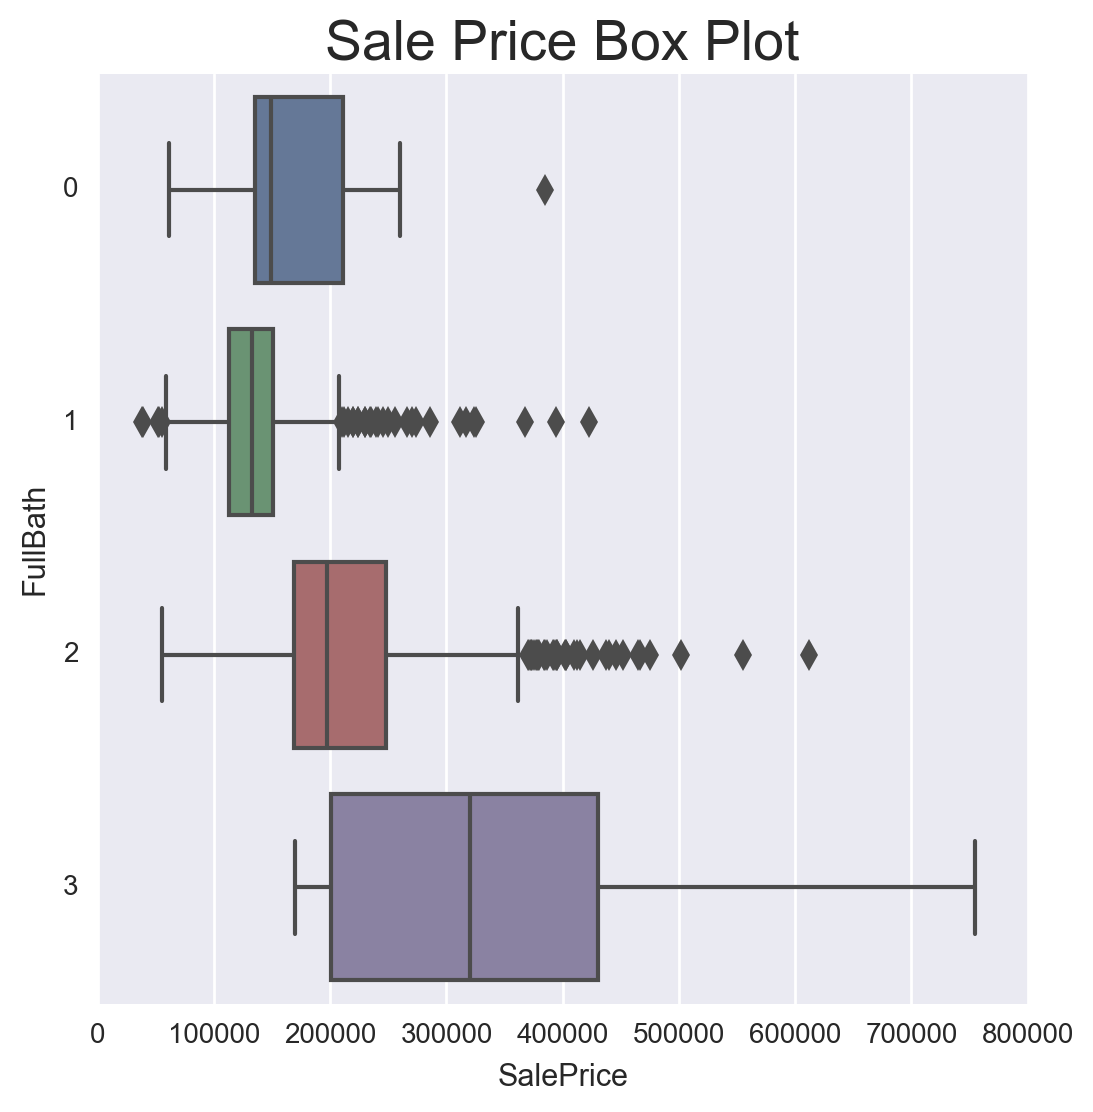

In [101]:
fig = plt.figure(figsize=(6,6))

axis = fig.gca()

axis = sns.boxplot(house.SalePrice, house.FullBath, orient='h',
                 fliersize=8, linewidth=1.5, 
                 saturation=0.5, ax=axis)

axis.set_title('Sale Price Box Plot', fontsize=20)

plt.show()

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Univariate regression predicting price with statsmodels

---

### 7.1 Build a linear regression with statsmodels predicting sales price from total living area sq ft.

Print the results of the regression.


In [116]:
price = house.SalePrice.values/1000.
sqft = house['TotalSqFt'] = house['1stFlrSF'] + house['2ndFlrSF']

In [114]:
def calculate_yhat(x, b0, b1):
    return b0 + b1*x

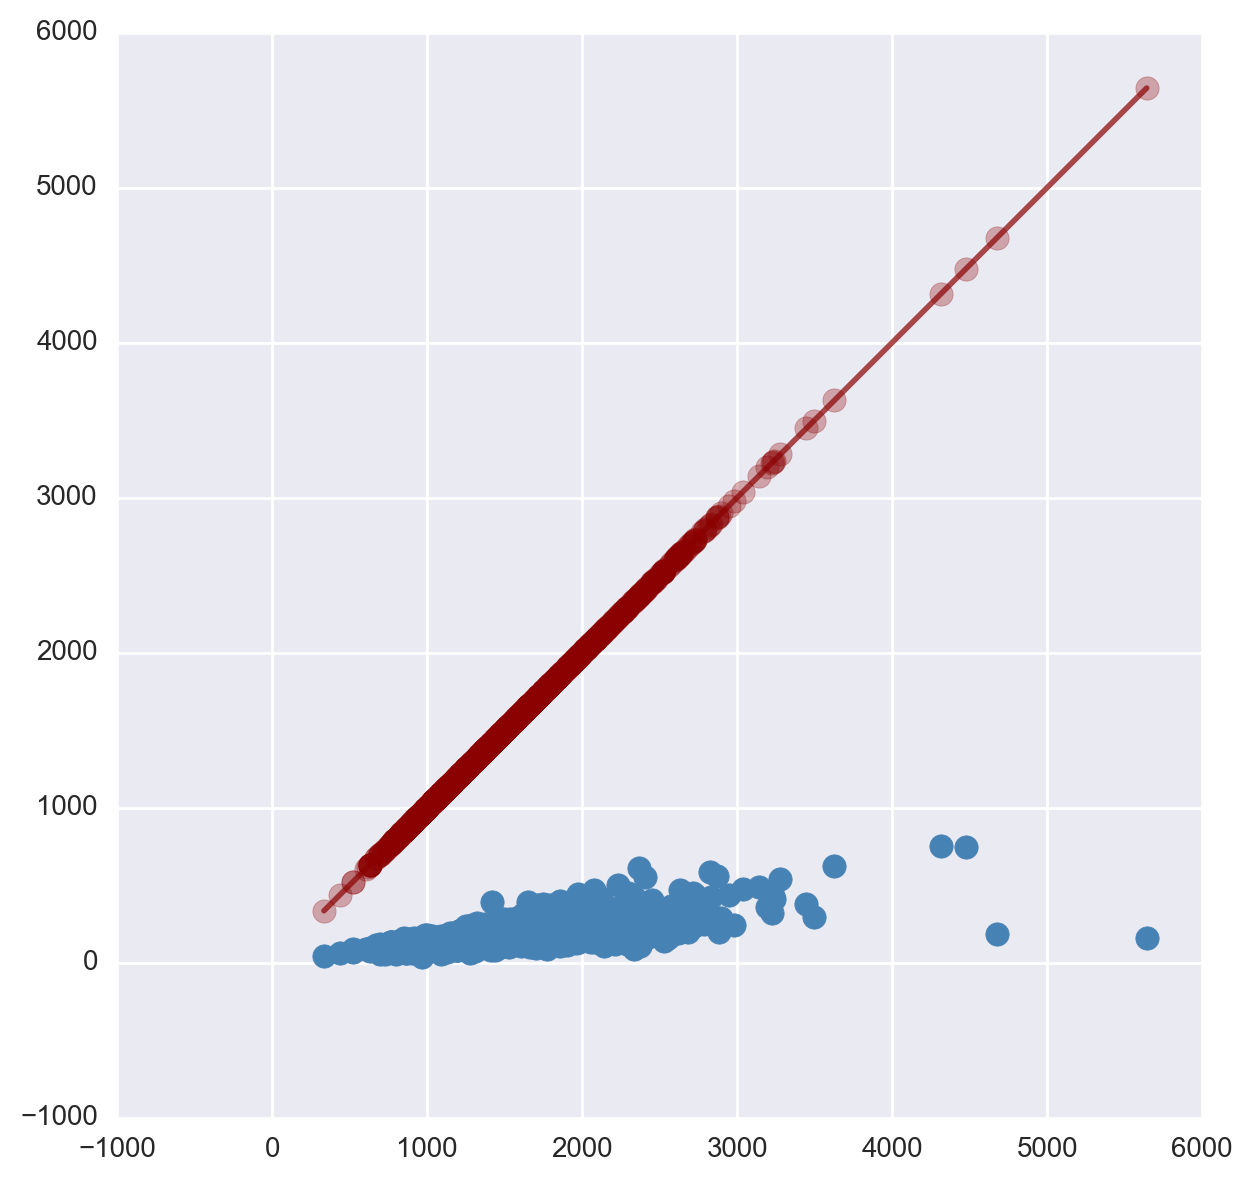

In [117]:
b0 = 0
b1 = 1

def plot_regression(x, y, b0, b1):
    
    fig = plt.figure(figsize=(7,7))
    ax = fig.gca()
    
    yhat = calculate_yhat(x, b0, b1)
    
    ax.scatter(x, y, color='steelblue', s=70)
    ax.scatter(x, yhat, color='darkred', s=70, alpha=0.3)
    
    min_x, max_x = np.min(x), np.max(x)
    min_yhat = calculate_yhat(min_x, b0, b1)
    max_yhat = calculate_yhat(max_x, b0, b1)
    
    ax.plot([min_x, max_x], [min_yhat, max_yhat], color='darkred',
            linewidth=2.0, alpha=0.7)
    
    plt.show()


plot_regression(sqft, price, b0, b1)

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Multivariate regression predicting price with sklearn

---

### 8.1 Build an sklearn linear regression predicting sale price 

Use all of your continuous measures as predictors (no categorical yet).

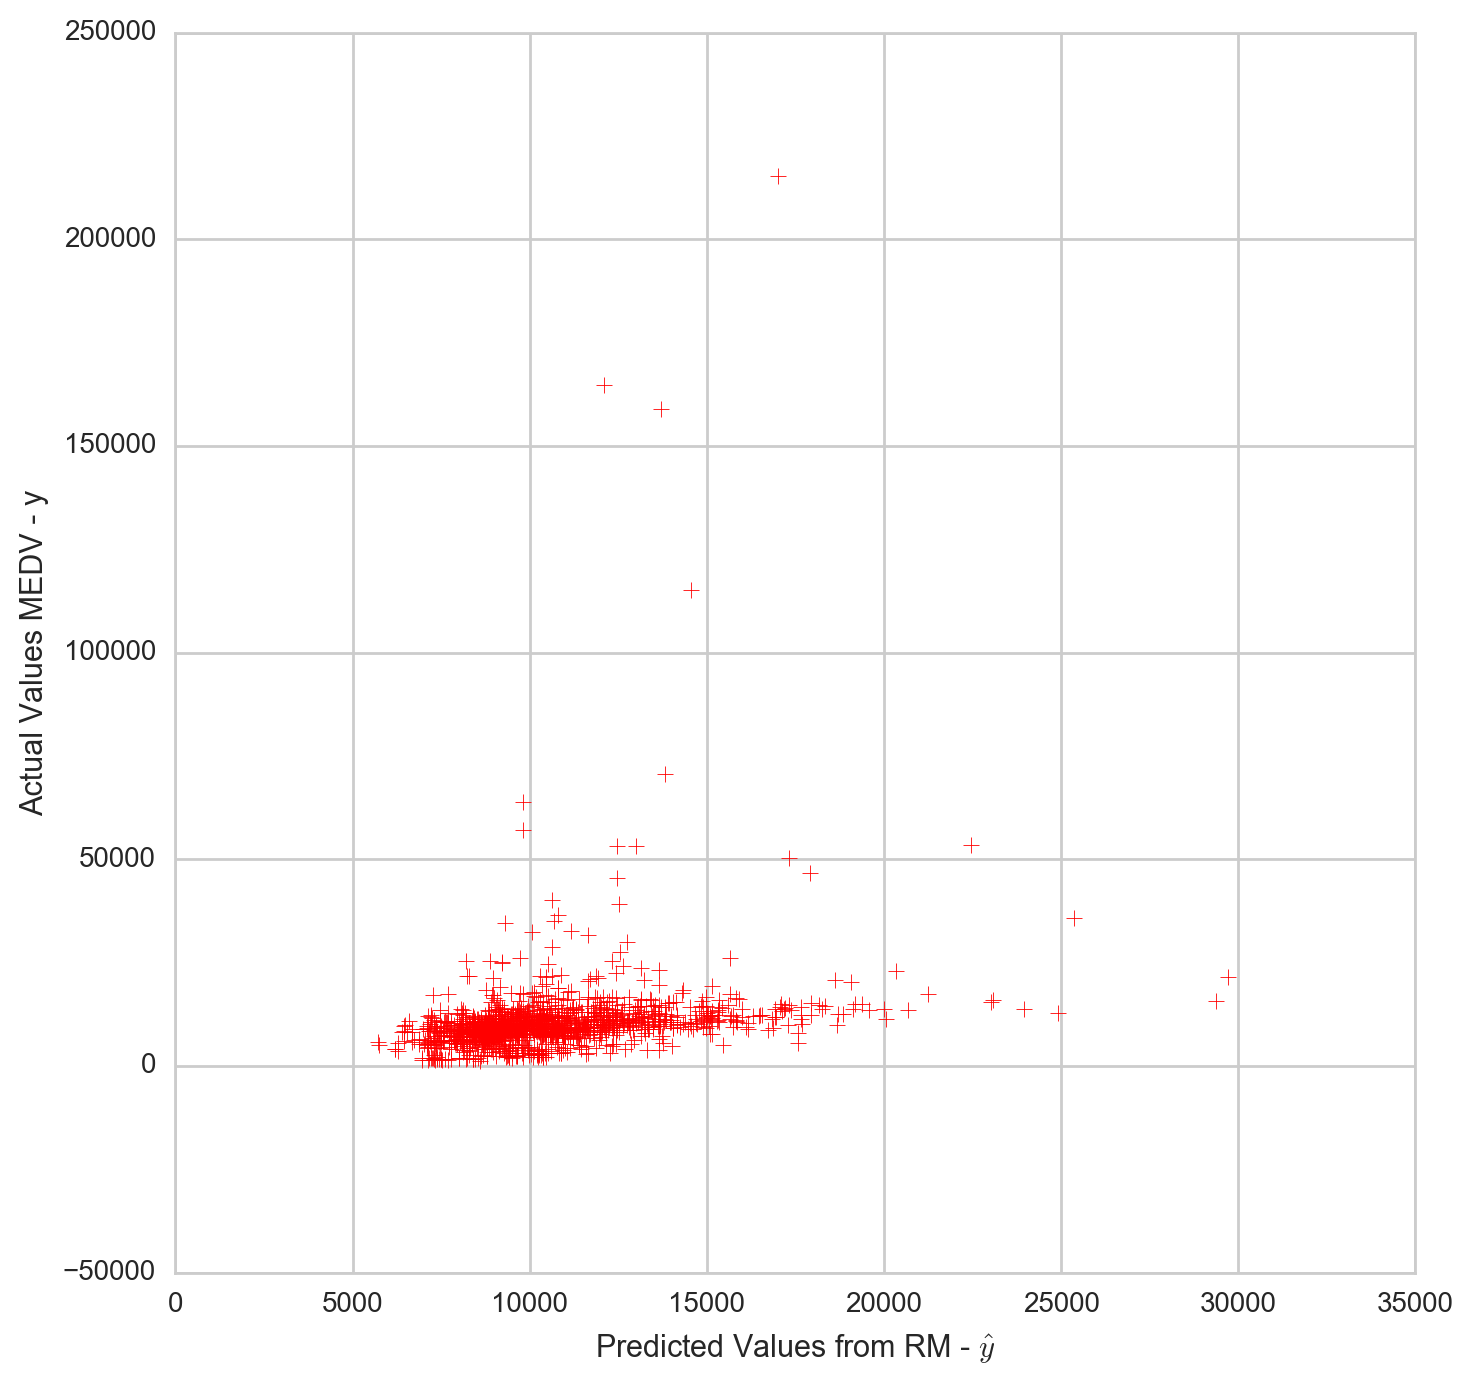

score:  0.0700739992303


In [123]:
#do the train test here

lm = linear_model.LinearRegression()

X = house[["SalePrice"]]
y = house[["LotArea"]]

model        =  lm.fit(X, y)
predictions  =  model.predict(X)

# X.values[0:4], predictions[0:4]
score        =  model.score(X, y)

# Plot the model
## s = s: size in points, c = color, zorder = layer order


plt.figure(figsize=(8,8))
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values from RM - $\hat{y}$")
plt.ylabel("Actual Values MEDV - y")
plt.show()

print "score: ", score

### 8.2 Calculate the $R^2$ of your model.

In [ ]:
#linerar regression score - this is where you do the socre (move it down from 8.1)

### 8.3 Plot the residuals against the true values.

In [ ]:
#Yhat - y = residuals
#true valeus = y
#predictions are x - y's are retured (series one yhat) ,series 2 = y - then do the diff

### 8.4 Plot a histogram of the residuals.

In [ ]:
#y-yhat - how far off is prediction from actual

### 8.5 Make a plot to show the strength of the different coefficients.

In [103]:
# bar graph to show the height of the bars based on relative strength?
#coeffiction is the LR oblect after it has been fit
#zip the coefficinats and the columns (x.colums and coefficitnt) series

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 9. Create a predictor matrix using all viable predictors available to you

---

You will need to dummy code the categorical variables. This is done most easily using patsy by constructing a formula string to make the matrix, but can be done with sklearn functions or manually as well. 

Recall that the `C(variable)` syntax in patsy formulas will take the column named `'variable'` and make it into dummy coded columns. You may also need to rename columns, patsy has trouble with column names that start with numbers.

Lastly, remember that you may need to convert your target `y` from a matrix to a vector (patsy outputs it as 2D rather than 1D, which skearn may have trouble with.)

In [ ]:
#Patsy's creating 3 columns - specify categories -1 columns and add the -1 to get rid of the y-intercept

### 9.2 Fit a linear regression using all of the predictors and score it.

In [ ]:
#try to use patsy

### 9.3 Explain why this model and associated $R^2$ score may not be as "good" as they seem.

In [ ]:
#run regression on entire mode - testing on teh saem model that you are trining.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 10. Cross-validate the model

---

Use 20 folds and calculate the average $R^2$ of your model that has all of the predictors in it.

In [ ]:
#run it with 20 folds

### 10.2 What does the cross-validated average $R^2$ tell you?

In [ ]:
#

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 10.3 When can you have a negative $R^2$ score? Explain what it means.


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 11. Construct a Lasso regression and find the optimal regularization strength

---

Now you'll fit a Lasso regression using again the full predictor matrix. 

### 11.1 Using either `LassoCV` or `GridSearchCV` with `Lasso`, find the optimal regularization strength.

You are finding the best `alpha` to use with this data. For `LassoCV` you can use the `n_alphas` parameter to specify how many possible alphas you want the model to search over. With `GridSearchCV` you will have to give it a vector of the alphas you want to try.

Note that in both cases you will need to specify the number of cross-validation folds `cv`. 10 is generally a good number of folds. 

**Remember that you must standardize your predictor matrix when using regularization!**

In [ ]:
#run the lasso with a range of alphas

### 11.2 Construct a `Lasso` model with the optimal `alpha` and cross-validate the $R^2$.

In [ ]:
#rebuild the model using the alpha you get in 11.1. 
#Add the coeeficient (B)
#loass gets rid of the noise

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 11.3 Explain the effect of the Lasso regularization and why it can be useful.

### 11.4 Print out the variables with non-zero Lasso coefficients (with the coefficient).

How many variables remain? 

Tell a (brief) story about what is important for estimating price based on the variables and their coefficients. Just pick out the things most interesting to you.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 12. Construct a Ridge regression and find the optimal regularization strength

---

### 12.1 Create a predictor matrix of only variables related to sq. ft.

**Remember that you must standardize your predictor matrix before using Ridge regularization.**

### 12.2 Plot a correlation matrix of your predictors. Why might Ridge be useful here?

### 12.3 Find the optimal Ridge `alpha` using either `RidgeCV` or a combination of `GridSearchCV` and `Ridge`.



### 12.4 Compare the cross-validated $R^2$ score for a standard Linear Regression and your Ridge regression

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 13. Explain the difference between Ridge and Lasso regularization

---

- When are good scenarios to use each? What problems do they address?
- Why do they have the effects they do on coefficients?
- What is their effect on bias and variance?

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 14. Gridsearch an optimal `ElasticNet` regression.

---

On the full predictor matrix, search for the optimal hyperparameters for an Elastic Net regression. Remember that the Elastic net is a mixture of the Ridge and Lasso, and has both an `alpha` parameter to regularize as well as an `l1_ratio`, which is the balance of Lasso vs. Ridge.

How does the ElasticNet compare to the Lasso on the dataset? What does the `l1_ratio` tell you about the balance of Ridge vs. Lasso in your model?

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 15. Further fine-tune the model to predict price

---

Your goal is to create the model with the best predictive power.

You can use as much feature engineering and transformation of variables that you want, but please limit yourself to using the regression models we have covered in class thus far. When we cover models like Random Forests and Gradient Boosted Trees we will return to this dataset and see how they compare to the regression models.

For those that tackle this problem, you will have a chance to show what you did and compare to what your other classmates came up with during class (if you want). **Feel free to collaborate with your classmates on improving the model!**